In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
df = pd.read_csv("KMeans.csv")
df.head(8)

,Ad,Yas,Gelir
0,Ismail,28,5900
1,Kaan,42,15100
2,Ozben,27,5750
3,Galip,39,15400
4,Batuhan,41,15900
5,Muhittin,29,6200
6,Ali,38,16200
7,Bartu,36,15600


Text(0, 0.5, 'Gelir')

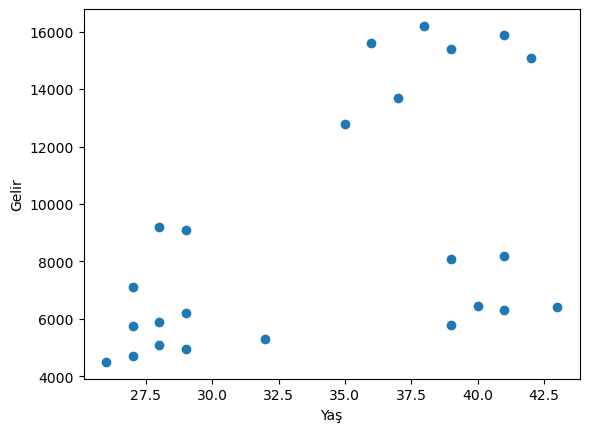

In [72]:
plt.scatter(df.Yas, df.Gelir)
plt.xlabel("Yaş")
plt.ylabel("Gelir")

**Verilerimizi normalize etmemiz lazım doğru sonuçlar almak için**

In [73]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [74]:
scaler.fit(df[["Gelir"]])
df["Gelir"] = scaler.transform(df[["Gelir"]])

In [75]:
scaler.fit(df[["Yas"]])
df["Yas"] = scaler.transform(df[["Yas"]])

In [76]:
df.head(8)

,Ad,Yas,Gelir
0,Ismail,0.117647,0.119658
1,Kaan,0.941176,0.905983
2,Ozben,0.058824,0.106838
3,Galip,0.764706,0.931624
4,Batuhan,0.882353,0.974359
5,Muhittin,0.176471,0.145299
6,Ali,0.705882,1.000000
7,Bartu,0.588235,0.948718


Text(0, 0.5, 'Gelir')

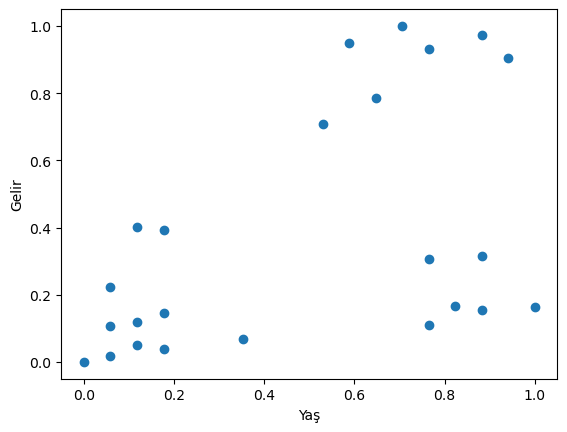

In [77]:
plt.scatter(df.Yas, df.Gelir)
plt.xlabel("Yaş")
plt.ylabel("Gelir")

In [78]:
from sklearn.cluster import KMeans
model =KMeans(n_clusters = 3)
y_pred = model.fit_predict(df[["Yas","Gelir"]])
y_pred

C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2,
       2, 0])

In [79]:
df["cluster"] = y_pred
df

,Ad,Yas,Gelir,cluster
0,Ismail,0.117647,0.119658,0
1,Kaan,0.941176,0.905983,1
2,Ozben,0.058824,0.106838,0
3,Galip,0.764706,0.931624,1
4,Batuhan,0.882353,0.974359,1
5,Muhittin,0.176471,0.145299,0
6,Ali,0.705882,1.000000,1
7,Bartu,0.588235,0.948718,1
8,Ayse,0.529412,0.709402,1
9,Recep,0.058824,0.222222,0


In [80]:
# Centroidler
model.cluster_centers_

array([[0.12834225, 0.14219114],
       [0.72268908, 0.89377289],
       [0.85294118, 0.20299145]])

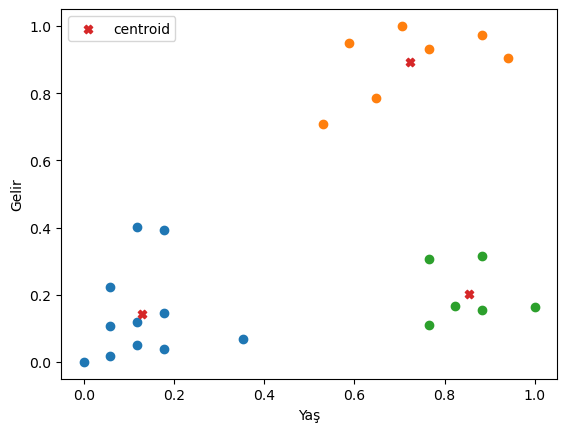

In [81]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.xlabel("Yaş")
plt.ylabel("Gelir")
plt.scatter(df1.Yas,df1.Gelir)
plt.scatter(df2.Yas,df2.Gelir)
plt.scatter(df3.Yas,df3.Gelir)

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], marker = "X", label = "centroid")
plt.legend()

In [82]:
df.sort_values("cluster")[["Ad","cluster"]]

,Ad,cluster
0,Ismail,0
20,Melih,0
15,Rauf,0
14,Seyma,0
13,Cihan,0
12,Ahmet,0
9,Recep,0
11,Talip,0
5,Muhittin,0
2,Ozben,0


**K değerini belirlemek (ELBOW YÖNTEMİ)**

In [83]:
k_range = range(1,20)
lst = []
for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(df[["Yas","Gelir"]])
    lst.append(model.inertia_)

C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\hilal\anaconda3\envs\Hilal\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a mem

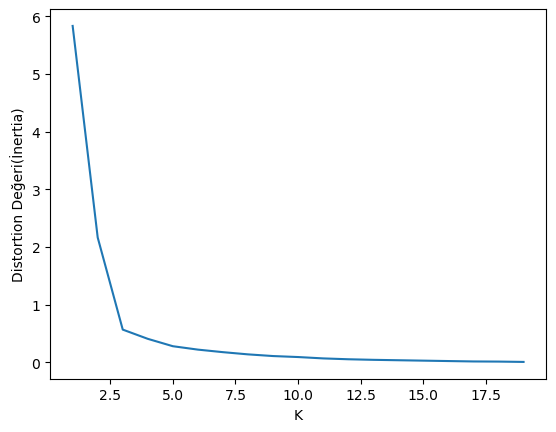

In [84]:
plt.xlabel("K")
plt.ylabel("Distortion Değeri(İnertia)")
plt.plot(k_range,lst)

**Dirsek değerini görmüş oluruz (Yani 3)**